# EDUNET FOUNDATION- Self-Paced Exercise

## Lab 1 : Logistic Regression on Customer Churn data  
## Problem Statement

### Telecom Churn (loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to retain their existing customers. 
### Here is provided a customer data comprising of mobile connection and related feature of many customers, also includes whether customer churned or not? Telecom Company needs Churn prediction model, to predict in advance whether customer will churn or not?

### Importing warning package to ignore the warnings¶

In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load required libraries 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression


### Load the dataset

In [3]:
churn_df=pd.read_csv("ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### Explore the Data

In [4]:
print(churn_df.info())
print('\n')
print(churn_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

### Select the required columns

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
print(churn_df.shape)
churn_df.head()


(200, 10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


###  DataFrame to Numpy

In [6]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
#X=X.drop(['tenure'],axis=1)
Y=churn_df[['churn']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

### Machine Learning Started .....

In [7]:
from sklearn.preprocessing import StandardScaler ### Preprocess the data
std_scl=StandardScaler()
std_scl.fit(np_X)
np_X_procs=std_scl.transform(np_X)


### Train / Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 9) (160, 1)
Test set: (40, 9) (40, 1)


### Model initialization &  training 

In [9]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

### Model Predictions

In [10]:
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print('\n')
print((Y_pred_prob))

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 0 0 1]


[[0.58711718 0.41288282]
 [0.56650898 0.43349102]
 [0.5313329  0.4686671 ]
 [0.66722528 0.33277472]
 [0.53481231 0.46518769]
 [0.59508358 0.40491642]
 [0.49995014 0.50004986]
 [0.56532893 0.43467107]
 [0.39939231 0.60060769]
 [0.59368426 0.40631574]
 [0.54844546 0.45155454]
 [0.58957413 0.41042587]
 [0.52439771 0.47560229]
 [0.41344893 0.58655107]
 [0.68930146 0.31069854]
 [0.51576247 0.48423753]
 [0.4969602  0.5030398 ]
 [0.46038301 0.53961699]
 [0.47010467 0.52989533]
 [0.57170621 0.42829379]
 [0.50781873 0.49218127]
 [0.49802608 0.50197392]
 [0.66938224 0.33061776]
 [0.49625351 0.50374649]
 [0.47635919 0.52364081]
 [0.73040145 0.26959855]
 [0.45111513 0.54888487]
 [0.49187403 0.50812597]
 [0.4927476  0.5072524 ]
 [0.73618723 0.26381277]
 [0.70809718 0.29190282]
 [0.5549927  0.4450073 ]
 [0.40681176 0.59318824]
 [0.73720605 0.26279395]
 [0.6355682  0.3644318 ]
 [0.60354024 0.39645976]
 [0.45884949 0.

### Model Evaluation

Model achieved a classification accuracy of:	0.65


Model Confusion Matrix


Jaccard Similarity Score:	0.36363636363636365


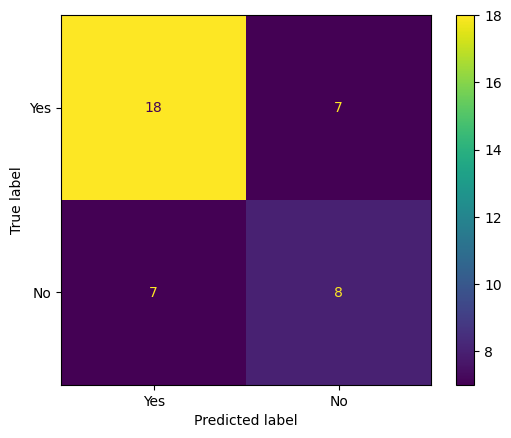

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))

### Generate classification report

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        25
           1       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40

